In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Objectives
- This project's objective is trying to forecast  the weather base historical data from 2006 to the present. 
- In this setting, I want apply two approaches to the problem:
   1. The first approach is to use classical statistical model such as ARIMA
   2. The second approach is to aplly machine learning model such as Neural Network
- After having the 2 models, comparison will be perform to access the effectiveness and accuracy of the 2 models. 

## Data Loading

In [2]:
X_train = pd.read_csv('data/weather_data_train.csv', index_col='datetime',
                     sep=';', decimal=',', infer_datetime_format=True)
X_test = pd.read_csv('data/weather_data_test.csv', index_col='datetime',
                     sep=';', decimal=',', infer_datetime_format=True)
y_train = pd.read_csv('data/weather_data_train_labels.csv', index_col='datetime',
                     sep=';', decimal=',', infer_datetime_format=True)
y_test = pd.read_csv('data/weather_data_test_labels.csv', index_col='datetime',
                     sep=';', decimal=',', infer_datetime_format=True)

## Data Exploration
Some important questions to first consider when first looking at a time series are:

- Is there a **trend**, meaning that, on average, the measurements tend to increase (or decrease) over time?
- Is there **seasonality**, meaning that there is a regularly repeating pattern of highs and lows related to calendar time such as seasons, quarters, months, days of the week, and so on?
- Are there **outliers**? In regression, outliers are far away from your line. With time series data, your outliers are far away from your other data.
- Is there a **long-run cycle** or period unrelated to seasonality factors?
- Is there **constant variance** over time, or is the variance non-constant?
- Are there any **abrupt changes** to either the level of the series or the variance?

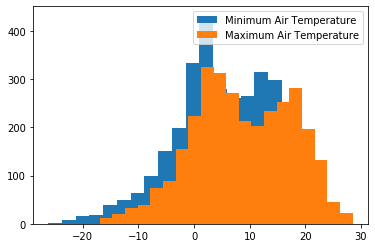

In [3]:
# Plot histogram of Tn_mu and Tx_mu:
plt.hist(X_train['Tn_mu'], bins=20, label='Minimum Air Temperature')
plt.hist(X_train['Tx_mu'], bins=20, label='Maximum Air Temperature')
plt.legend()

In [25]:
mu = X_train.iloc[:, :8]
var = X_train.iloc[:, 8:]

In [52]:
# Split features:
temp_train = X_train[['T_mu', 'Tn_mu', 'Tx_mu', 'Td_mu']]
pres_train = X_train[['Po_mu', 'P_mu']]
wind_train = X_train[['Ff_mu']]
visi_train = X_train[['VV_mu']]

# Split target 

In [82]:
test_obs = pd.concat([temp_train, visi_train,], axis=1)
ma_test_obs = cac.rolling(window=7).mean()

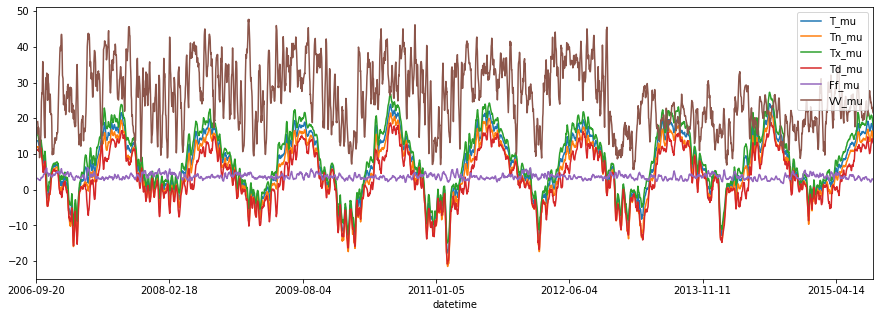

In [91]:
X_train[['T_mu', 'Tn_mu', 'Tx_mu', 'Td_mu', 'Ff_mu', 'VV_mu']].rolling(window=7).mean().plot(figsize=(15,5))

In [110]:
#df = X_train[['T_mu', 'Tn_mu', 'Tx_mu', 'Td_mu', 'Ff_mu', 'VV_mu']]
df = X_train.iloc[:, :8]
normed_df = (df-df.min())/(df.max()-df.min())

- From this plot we can see that temperature and visibility have strong positive correlation, while the wind speed has negative correlation with all other measures.

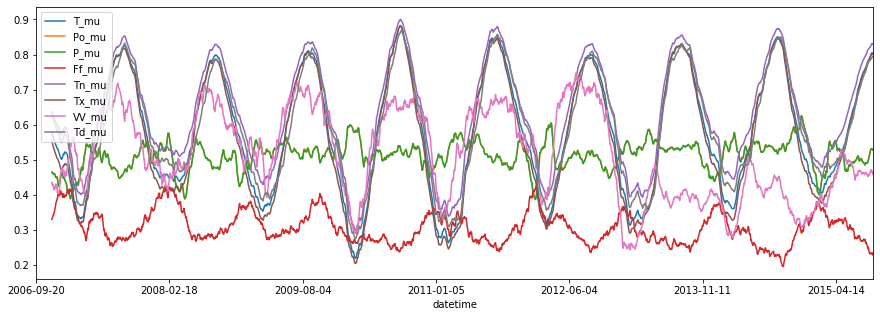

In [113]:
normed_df.rolling(window=60).mean().plot(figsize=(15,5))

## Regression
As observed from the plot of he data, we can see that temperature, wind speed, and visibility follow a sin wave pattern, so in order to predict these measures in the future, I propose 2 approach:
1. Try to fit a sin wave model to the data. 
    - Pros: there is no need to process time periods for training phase
    - Cons: there might not be available libraries for fitting sin wave pattern
2. Split the time-seires to obtain "clear" similar sections, then fit a quadratic model on those splits.
    - Pros: ready libraries for deployment
    - Cons: might be complicated in the split phase

## Classification